## common troubleshooting solutions:

1. make sure your file paths use these slashes / and end with a / 

3. are you in the righ file paths?
4. is your info file the same name as your tif file?

### NOTE: This is a 'cleaned' copy of the OMM_Analysis from the lab's github I made from running data from ONI using TIFF files. If you have something  else, this is not for you.   
  
    

## OMM Analysis

In [3]:
import sys
import os
import pandas as pd

sys.path.append(r'D:/Jerry/code/OMMxDORA-tomerge/sma/') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)
from DisplayHist import disp_hist
from ffpdax import ffp_dax
from ffptif import ffp_tif
import DORA

analysisPath=r'D:/Jerry/DATA/localization_precision_dev_data/20230126_bases_forjerry/10hz_25laser-1_PC/pos_0/'

xmlName='ORBIT_Analysis_Settings'

analysisName='test'
exp_title = "10hz_25laser-1_posXY0_channels_t0_posZ0_photonct"
xmlFilename=analysisPath+xmlName
filename=analysisPath+analysisName
ffp_tif(filename,xmlFilename)

# TRJ file to CSV

In [2]:
import os
newpath = filename+'trcsv'
if not os.path.exists(newpath):
    os.makedirs(newpath)    #makes a new folder in with same name as filename but ending in trcsv
    
from tr2csv import tr_2csv
tr_2csv(filename)           #Generates CSV file from .tr files      

# 2D Histogram



In [3]:
import numpy as np

histInfoName=filename+'trdir/histpar' # opens the infromation file
histInfoFile = open(histInfoName+'.info','rb')
histInfo=np.fromfile(histInfoFile,dtype='int32')
histInfoFile.close()
print("Number of peaks")
print(histInfo[3])
histInfo[3]

Number of peaks
58


58

In [4]:
#display settings for tracjectories
histPerCol=5
histPerRow=5

print("Displaying")
print(histPerRow*histPerCol)

Displaying
25


In [5]:
#when you run this, you should get a pop up window. check your windows bar at the bottom of the deskstop  
import numpy as np
from PIL import Image
import argparse
import cv2


[refptnp,refsc,refcol,sum_of_rows, out]=disp_hist(filename,histPerCol,histPerRow) #change for dax
print('pk, t1 ,t2')
print(out)


[   1    0 1000]
[   1    0 1000]
[   1    0 1000]
pk, t1 ,t2
[[   1    0 1000]
 [   1    0 1000]
 [   1    0 1000]]


In [6]:
#Remeber python indexs from 0 so if you want your first selection to be the peak you analyze pick 0
#also the peaks go in paired sets, the first two selections will be "peak 0"

chosenpk=0

#pk=str(out[chosenpk*2,0]).zfill(5)
#frStart=out[chosenpk*2,1]
#frEnd=out[((chosenpk*2)+1),2] 
#print("Peak: "+pk)
#print("Start: "+str(frStart))
#print("End: "+str(frEnd))

pk=str(16).zfill(5)
csvpath=filename+'trcsv/'
csvnum=csvpath+pk+'.csv'
print(csvnum)

D:/Jerry/DATA/localization_precision_dev_data/20230126_bases_forjerry/10hz_25laser-1_PC/pos_0/testtrcsv/00016.csv


# DORA Graphing

### Step 1: Input graphing parameters

In [7]:

sys.path.append(r"D:\Jerry\code\OMMxDORA-tomerge\test_set")
exp_tag = "RecBCD" # a tag that caries the name of the experiment
file_name = "RecBCD.csv" 
analysisName = None

In [6]:
#universal parameters
# exp_tag = exp_title + pk # a tag that caries the name of the experiment
# file_name = csvnum  
pixel_size = 117  # in nanometers
time_step = 100  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = -1  # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

#downsampling parameters
bin_size = 10  # bin size for downsample/filter processing
processing = "downsample"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "angular_continuous_filtered"
#plot_type = "2D"
# Graphing options:
    # Trajectory Maps:
    # 2D: Colorful 2D visulization of the rotor from above
    # 3D: 2D plot but time is an axis

    # Grid plot
    # grid: a grid of little snippets of the data

    # Angular Analysis:

    #         By Jerry
    # radius_filter: Demarcate the excluded data points that will be eliminated from calculations
    # find_excluded_angle: Indicate excluded angles within angular_continuous by Jerry
    # angular_continuous_filtered: Angular Continuous recalculated with excluded points filtered. Excluded points skips indicated.
    # basal3: Graphs tailored for the basal graph analysis 3/14/2022
    # Angular Continuous with a downsampled curve as well. still has bugs with excluded type labelling

    #         By Claire:  [NOT DONE]
    # angular: angle vs time, but it's not cummulative and resets at 360 to 0 (Claire)
    # angular_continuous: Claire's Calculation of a cummulative angle
    # find_excluded_angle_CR: Indicate excluded angles within angular_continuous by Claire's calculations

    # Animation   [NOT DONE]
    # interactive: Interactive graph
    # animated: animated trajectory in notebook
    # HTML: Animated trajectory in a new window. May run better

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find excluded angle
display_center = "no"

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'yes'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter

#       Formatting parameters for 'angular_continuous_filtered' plot
# enter 'line' or 'scatter' for a line graph or a scatter plot. Line plot makes up points when hovered
graph_style = 'line'


#Formatting parameters 'grid' plot
frames_per_plot = 20  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

NameError: name 'analysisName' is not defined

### Step 2: Find Center of Peak

I have saved the picture with the name:
Algorithm_Center_Guess_10hz_25laser-1_posXY0_channels_t0_posZ0_photonct00016_centering.png


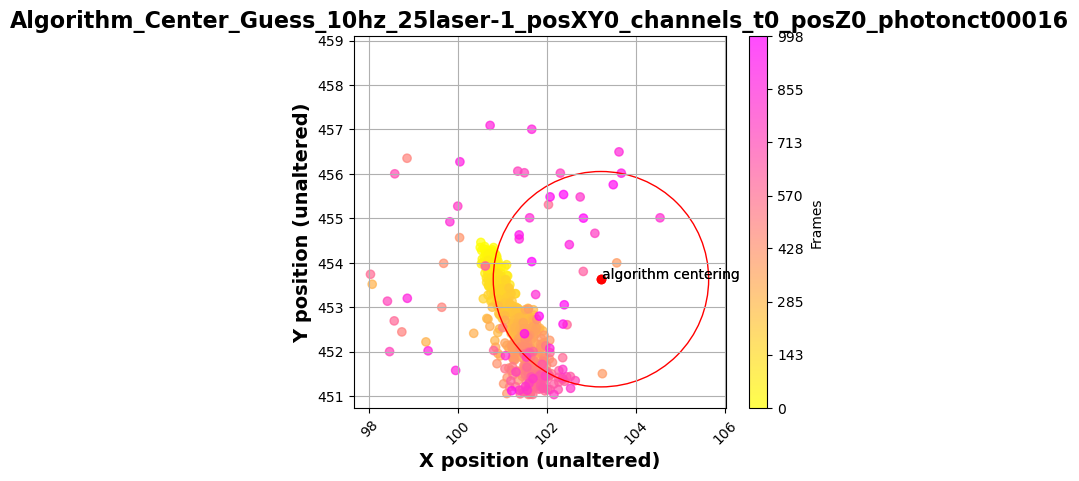

The center is (103.21114909892178, 453.63009643554693)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


In [8]:
initial_parameters = [file_name, time_step, frame_start, frame_end, cmap, exp_tag, first_zero_end, graph_centers,save_plot]
center, data, ind_invalid_reading, data_back, my_rad_estimate = DORA.find_center(*initial_parameters)

### Step 3: Downsample Data

In [9]:
## redefine center
center = [101,453]

In [10]:
downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
if processing == "downsample":
    down_sampled_df,frame_start,frame_end = DORA.downsample(*downsample_parameters)
else:
    down_sampled_df = DORA.downsample(*downsample_parameters)

NOTE: If you have downsampled data already, please input file name and load file here:

In [75]:
# Input folder where file is saved. 
down_sampled_data_folder = r"C:\Users\jerry\Desktop\Research\Kosuri\Coding\OMMxDORA-tomerge\test_set\small_csv_batch\trimmed_csv"
# Input name of file
down_sampled_csv = "OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv"
file_name = down_sampled_csv # override above file name above with this file name 

# Append saving file to saving folder path
down_sampled_data_file_path = os.path.join(down_sampled_data_folder,down_sampled_csv)
# read in file and redefine the new file as the new down_sampled_df
down_sampled_df = pd.read_csv(down_sampled_data_file_path)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jerry\\Desktop\\Research\\Kosuri\\Coding\\OMMxDORA-tomerge\\test_set\\small_csv_batch\\trimmed_csv\\OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv'

In [11]:
down_sampled_df["X displacement (nm)"].shape
down_sampled_df.head()

,index,X movement,Y movement,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms)
0,4.5,100.690264,454.295822,-0.309736,-36.239097,-36.239097,151.611191,450.0
1,14.5,100.662621,454.215640,-0.337379,-39.473307,-39.473307,142.229910,1450.0
2,24.5,100.685085,454.116483,-0.314915,-36.845020,-36.845020,130.628458,2450.0
3,34.5,100.721432,454.083127,-0.278568,-32.592487,-32.592487,126.725839,3450.0
4,44.5,100.807966,453.997107,-0.192034,-22.467995,-22.467995,116.661511,4450.0


### Step 4: Graph Data

In [78]:
data

,index,X position,Y position,Intensity,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms),Radius (nm),z-score Rad,Angle
0,0,100.592545,454.366516,1215.0,-0.407455,1.366516,-47.672287,159.882385,0,166.838317,0.441079,253.396947
1,1,100.746689,454.251892,1399.0,-0.253311,1.251892,-29.637405,146.471375,100,149.439752,0.235251,258.561065
2,2,100.493515,454.344269,1483.0,-0.506485,1.344269,-59.258743,157.279449,200,168.072674,0.455681,249.354916
3,3,100.710602,454.263611,1257.0,-0.289398,1.263611,-33.859589,147.842468,300,151.670258,0.261638,257.100315
4,4,100.793610,454.342407,1333.0,-0.206390,1.342407,-24.147675,157.061646,400,158.907113,0.347251,261.259417
...,...,...,...,...,...,...,...,...,...,...,...,...
973,973,101.821587,452.797791,234.0,0.821587,-0.202209,96.125633,-23.658508,97300,98.994254,-0.361527,13.826860
977,977,102.369392,455.536041,422.0,1.369392,2.536041,160.218910,296.716827,97700,337.210579,2.456609,298.367824
978,978,102.816978,455.005280,370.0,1.816978,2.005280,212.586479,234.617706,97800,316.604610,2.212837,312.179640
979,979,101.490944,452.403107,329.0,0.490944,-0.596893,57.440437,-69.836517,97900,90.424239,-0.462912,50.562751


In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker

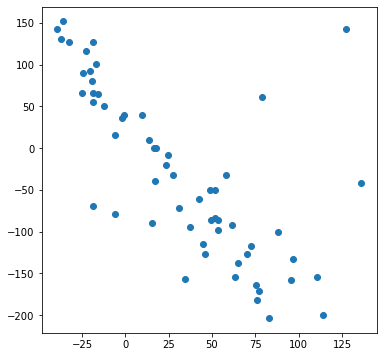

In [13]:
my_x = down_sampled_df["X displacement (nm)"]
my_y = down_sampled_df["Y displacement (nm)"]

fig, ax = plt.subplots(1,1,figsize = (6,6))
ax.scatter(my_x,my_y)

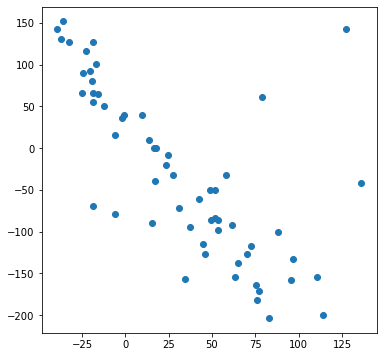

In [14]:
# Claire's code accepts down_sampled_df as df
df = down_sampled_df

#####################Graphing data assignment block##############
# Here the code determines the units of the graph, only for cartesian graphs
if unit == "pixel":
    x = df["X displacement (pixels)"]
    y = df["Y displacement (pixels)"]
if unit == "nm":
    x = df["X displacement (nm)"]
    y = df["Y displacement (nm)"]
z = df["Time (ms)"]

fig1, ax1 = plt.subplots(1,1,figsize = (6,6))
ax1.scatter(x,y)


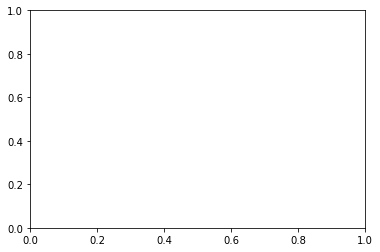

In [69]:
plt.cla()

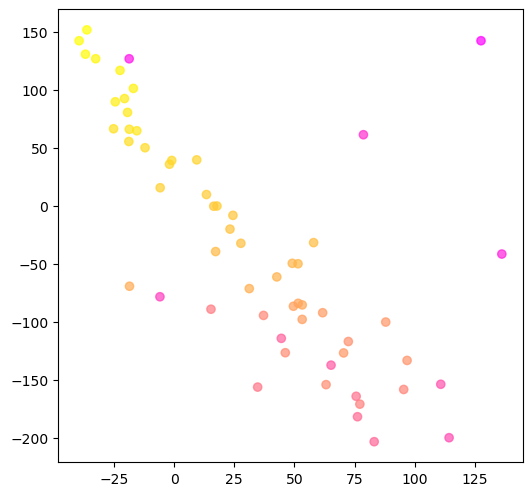

In [15]:
# Claire's code accepts down_sampled_df as df
df = down_sampled_df

#####################Graphing data assignment block##############
# Here the code determines the units of the graph, only for cartesian graphs
if unit == "pixel":
    x = df["X displacement (pixels)"]
    y = df["Y displacement (pixels)"]
if unit == "nm":
    x = df["X displacement (nm)"]
    y = df["Y displacement (nm)"]
z = df["Time (ms)"]

# fig, ax = plt.subplots(1,1,figsize = (6,6))
# ax.scatter(x,y)

 # Let the graphing beghin!!!
fig = plt.figure(figsize=(6, 6), dpi=100)
# this comand is here to take advantage of the "axes" plotting library
ax = fig.add_subplot(111)

# Set up for color bar
#HARD CODE:
z_axis_label = "Frames" 

# A color bar associated with time needs two things c and cmap
#these arguments go into ax.scatter as args

# c (A scalar or sequence of n numbers to be mapped to colors using cmap and norm.)
c = df["index"]

#Make a ticks vector that spans the total number of frames
# There is a bug because linspace doesn't understand what -1 is but the sequence does
if frame_end == -1:   # negative 1
    last_frame = df["index"].iat[-1] #in the index column, give me the last valid value --> this is the max Frames
else:
    last_frame = frame_end
#tix = np.linspace(frame_start,last_frame,9)
#tix_1 = np.round(tix,0)
frame_step=int((last_frame-frame_start)/5)

tix_1=np.arange(frame_start,last_frame,frame_step)

#scatter plot with a color vector
p = ax.scatter(x, y, c=c, cmap = cmap,alpha=0.7)
# #add a vertical side bar that defines the color
# plt.colorbar(p, label=z_axis_label, shrink=.82, ticks = tix_1 )


# plt.axis('square')
# plt.xticks(rotation=45)
# circle2 = plt.Circle((0, 0), 80, color='m', fill=False)

# ax.add_patch(circle2)

# # display center
# if display_center == "yes":
#     # in a centered graph, the center is actually(0,0)
#     center1 = [0, 0]
#     # plots center point as magenta X
#     ax.scatter(0, 0, color='Magenta', marker="X", s=150)
#     plt.text(x=center1[0] + 0.02,
#                 y=center1[1] + 0.02, s='CENTER')

# # set graph limit conditions depending on unit specified
# if unit == "pixel":
#     ax.set_xlim(pixel_min, pixel_max)
#     ax.set_ylim(pixel_min, pixel_max)
#     ax.yaxis.set_major_locator(
#         ticker.LinearLocator(axis_increment_pixel))
#     ax.xaxis.set_major_locator(
#         ticker.LinearLocator(axis_increment_pixel))
# if unit == "nm":
#     ax.set_xlim(nm_min, nm_max)
#     ax.set_ylim(nm_min, nm_max)
#     ax.yaxis.set_major_locator(
#         ticker.LinearLocator(axis_increment_nm))
#     ax.xaxis.set_major_locator(
#         ticker.LinearLocator(axis_increment_nm))

# # Jerry Adds a hover cursor
# mplcursors.cursor(hover=True)
# mplcursors.cursor(highlight=True)

# # axis labels and font configurations
# ax.set_xlabel(x_axis_label, fontweight='bold', fontsize=14)
# ax.set_ylabel(y_axis_label, fontweight='bold', fontsize=14)

# # plot title and font configurations

# # take the file name and separate from the extension
# # the first value in the tuple is the number
# # the second is .csv 
# # the number 00086.csv is the peak --> so this code takes the peak number
# pk = os.path.splitext(file_name)[0]

# graph_type = '2D_Map'

# # change title order!!! 
# list_of_strings = [graph_type, exp_tag]

# #in quotes is the the delimiter between the items in the string
# # by default it is a _ 
# my_title = "_".join(list_of_strings)

# plt.title(my_title, fontweight='bold', fontsize=16)

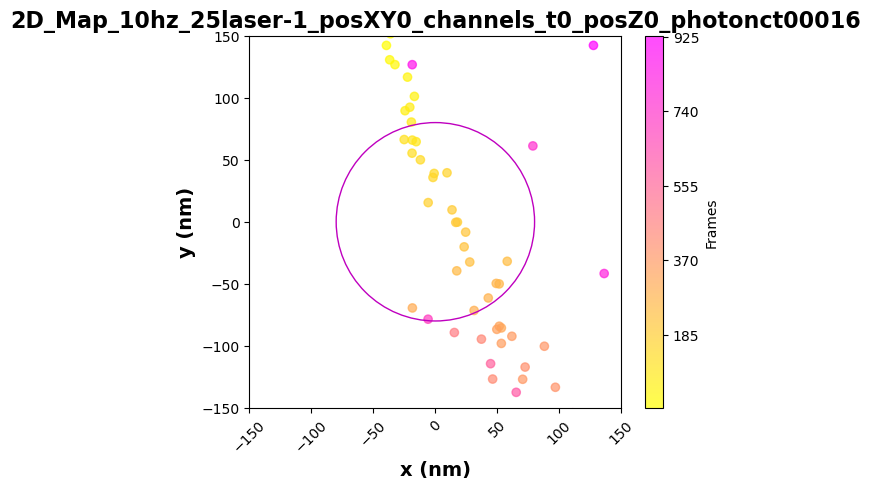

In [16]:
#Graph Groupings:
# create a list of the acceptable groupings for the trajectory maps
trajectory_map = ["2D", "3D"]

# create a list of the acceptable groupings for the Angle Time grouping
AngleTime = ["radius_filter", "find_err_angle", "angular_continuous_filtered",
                "basal3", "angular", "angular_continuous", "find_err_angle_CR"]

# create a list of the acceptable groupings for the Animations Grouping

animations = ["interactive", "animated", "HTML"]




#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

#Angle Versus Time (AVT or avt) parameters:
avt_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap, exp_tag] 

#Animated Parameters
animated_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap, exp_tag, frame_speed, tail_length] 

#Grid Parameters
grid_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag, 
frames_per_plot, columns, fig_size_x, fig_size_y]


# #DORA.graph(plot_type,*relevant_parameters)

if plot_type == "2D" or plot_type == "3D":
    DORA.graph(plot_type,*tajectory_map_parameters)
if plot_type in animations:
    %matplotlib notebook
    DORA.graph(plot_type,*animated_parameters)
if plot_type == "grid":
    DORA.graph(plot_type, *grid_parameters)
if plot_type in AngleTime:
    DORA.graph(plot_type,*avt_parameters)

### Step 5: Animate Plots

Imports for the code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Choose animation plot parameters ###
cmap_name = "plasma_r"
tail_length = 50
frame_speed_ms = 20

### Allocate X and Y data into dataframe called coords ###

# import matplotlib
import matplotlib.pyplot as plt
# allows for animation to animate
%matplotlib notebook

# establish coordinate dataframe
coords = down_sampled_df[["X displacement (nm)", "Y displacement (nm)"]].copy()
coords = coords.rename(columns={"X displacement (nm)": "x", "Y displacement (nm)": "y"})

### Make an initial graph ###

fig, ax = plt.subplots(1,1,figsize = (5,5))

# plot title and font configurations

# take the file name and separate from the extension
# the first value in the tuple is the number
# the second is .csv 
# the number 00086.csv is the peak --> so this code takes the peak number
pk = os.path.splitext(file_name)[0]

graph_type = 'Animated' 

# change title order!!! 
list_of_strings = [graph_type, exp_tag]

#in quotes is the the delimiter between the items in the string
# by default it is a _ 
my_title = "_".join(list_of_strings)

plt.title(my_title, fontweight='bold', fontsize=16)
ax.set_title(my_title, fontweight = 'bold', fontsize = 16)
ax.set_xlabel("X (nm)",fontweight = 'bold', fontsize = 12)
ax.set_ylabel("Y (nm)",fontweight = 'bold', fontsize = 12)
ax.set_xlim([-60,60])
ax.set_ylim([-60,60])
ax.grid()
sc = ax.scatter([], [])

### Define animation function ###

# animation function feeds a window of dataframe values into the graphing function at a time,
# iterates over user specified range in dataframe with user specified tail length
# color of animation is also specified here
def animate(count):
    sc.set_offsets(np.c_[coords.x.values[count-tail_length:count],coords.y.values[count-tail_length:count]])
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(vmin=0, vmax=tail_length)
    z = np.array(range(tail_length))
    c = cmap(norm(z))
    sc.set_color(c)
    
    # [UNDER DEVELOPMENT]animated colorbar still under development
#     # Create or update colorbar
#     if not hasattr(animate, "cbar"):
#         # Create colorbar if it does not exist
#         animate.cbar = plt.colorbar(sc, cmap = cmap_name)
#         animate.cbar.set_label('Time (frames)')
# #         animate.cbar.set_ticks(range(tail_length+1))
#     else:
#         # Update colorbar with current frame data
#         animate.cbar.mappable.set_clim(vmin=0, vmax=tail_length)
#         animate.cbar.draw_all()

#     return sc
    
    #button_ax = plt.axes([.78, .87, .1, .07]) # creates an outline for a potential button
ani = FuncAnimation(fig, animate, interval= frame_speed_ms, frames = len(coords)) #frames=len(df)
            #ani.toggle(ax=button_ax)# potential button toggle for a potential button ;)
plt.tight_layout()
plt.show()
# Display the animation as HTML
HTML(ani.to_jshtml())

### Below cells are for loading test data for trouble shooting


In [ ]:
#Load a dummy file of data so you can troubleshoot
# this is test data within the OMMxDORA git repo
down_sampled_df  = pd.read_csv("./test_set/small_csv_batch/trimmed_csv/OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv")